In [1]:
#1
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score

#加载数据
iris=datasets.load_iris()
X=iris.data
y=iris.target

#划分鸢尾花数据集，训练集比例0.2，随机种子42
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=42)

# #特征缩放
# scaler=StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

#训练SVM
svm=SVC(kernel='linear',random_state=42)
svm.fit(X_train,y_train)

#预测与评估
y_pred=svm.predict(X_test)

print(f'The accuracy_score is {accuracy_score(y_test,y_pred)}')
print(f'The recall_score is {recall_score(y_test,y_pred,average='weighted')}')
print(f'The f1_score is {f1_score(y_test,y_pred,average='weighted')}')
print(f'The confusion_matrix is {confusion_matrix(y_test,y_pred)}')

The accuracy_score is 0.975
The recall_score is 0.975
The f1_score is 0.9749746835443038
The confusion_matrix is [[43  0  0]
 [ 0 36  3]
 [ 0  0 38]]


文本类别名称
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

数据描述与数据样例
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his

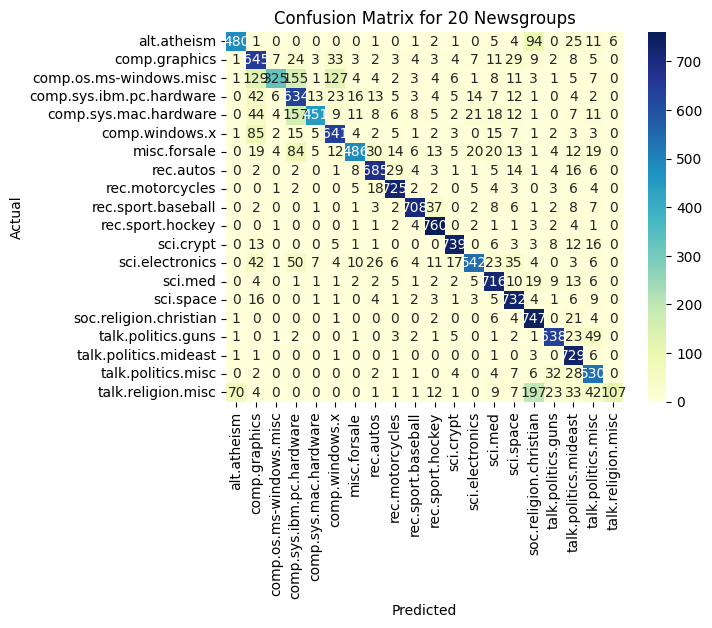

In [2]:
#2
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

#导入数据集
newsgroups = fetch_20newsgroups(subset = 'all')
data = newsgroups.data
target = newsgroups.target

#类别标签、数据集的描述、数据样本
print("文本类别名称")
print(newsgroups.target_names)
print()
print("数据描述与数据样例")
print(newsgroups.data[0])

#词袋模型
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data)

#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,target,test_size=0.8,random_state=42)

#构建并训练朴素贝叶斯分类器
clf = MultinomialNB()
clf.fit(X_train, y_train)

#预测
y_pred = clf.predict(X_test)

#评估
print(f'The accuracy_score is {accuracy_score(y_test,y_pred)}')
print(f'The recall_score is {recall_score(y_test,y_pred,average='weighted')}')
print(f'The f1_score is {f1_score(y_test,y_pred,average='weighted')}')

#混淆矩阵绘图
conf_mat=confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='d',xticklabels=newsgroups.target_names,yticklabels=newsgroups.target_names,cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for 20 Newsgroups')
print('The confusion matrix for 20 newsgroups is:')
plt.show()

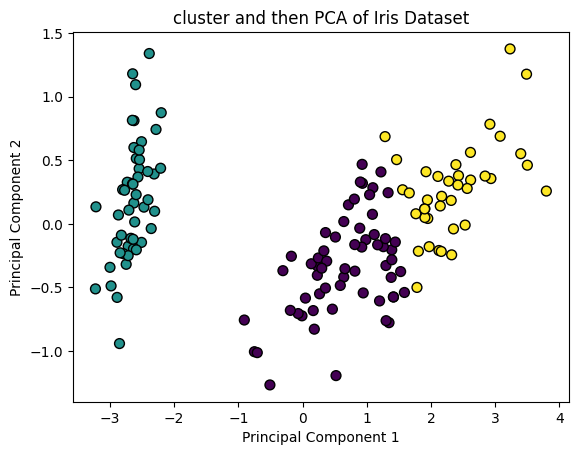

The silhouette coefficient is 0.5976764219547992


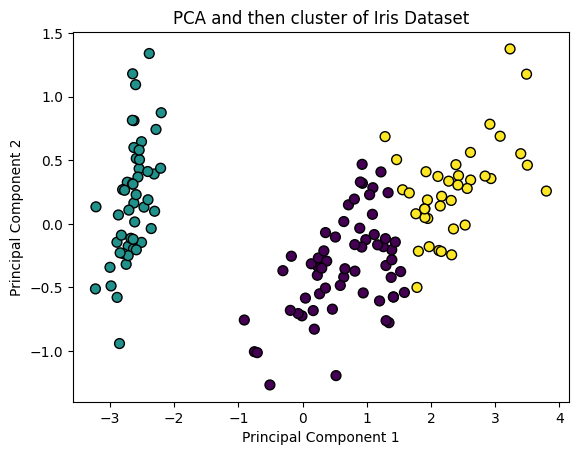

The silhouette coefficient is 0.5976764219547992
可以看到，两种顺序在N_cluster=3时，得到的结果是一致的，但是并不代表在其他情况下是一致的


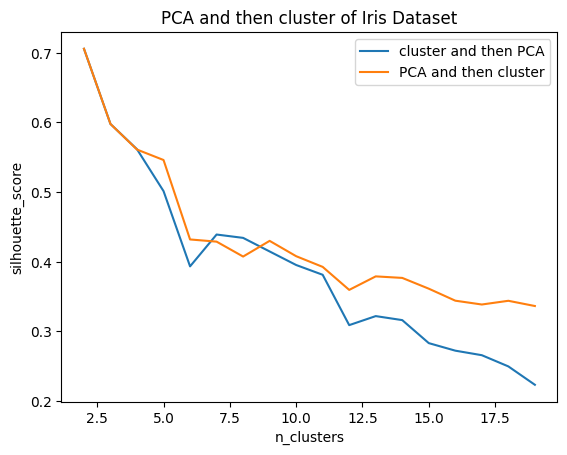

In [3]:
#3
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

#1.先聚类，再主成分分析
#使用KMeans进行聚类
kmeans1 = KMeans(n_clusters=3, random_state=0)
kmeans1.fit(X)
y_kmeans1 = kmeans1.predict(X)

#使用PCA进行降维
pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(X)

#KMeans聚类结果的PCA降维
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], c=y_kmeans1, cmap='viridis', edgecolor='k', s=50)
plt.title('cluster and then PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(f'The silhouette coefficient is {silhouette_score(X_pca1,y_kmeans1)}')

#2.先主成分分析，再聚类
#使用PCA进行降维
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)

#使用KMeans进行聚类
kmeans2 = KMeans(n_clusters=3, random_state=0)
kmeans2.fit(X_pca2)
y_kmeans2 = kmeans2.predict(X_pca2)

#KMeans聚类结果的PCA降维
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y_kmeans2, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA and then cluster of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print(f'The silhouette coefficient is {silhouette_score(X_pca2,y_kmeans2)}')

print("可以看到，两种顺序在N_cluster=3时，得到的结果是一致的，但是并不代表在其他情况下是一致的")

#绘制轮廓系数与聚类数的关系
n_clusters=[i for i in range(2,20)]
silhouette_score_1=[]
silhouette_score_2=[]
for i in n_clusters:
    kmeans1 = KMeans(n_clusters=i, random_state=0)
    kmeans1.fit(X)
    y_kmeans1 = kmeans1.predict(X)
    pca1 = PCA(n_components=2)
    X_pca1 = pca1.fit_transform(X)
    silhouette_score_1.append(silhouette_score(X_pca1,y_kmeans1))

    pca2 = PCA(n_components=2)
    X_pca2 = pca2.fit_transform(X)
    kmeans2 = KMeans(n_clusters=i, random_state=0)
    kmeans2.fit(X_pca2)
    y_kmeans2 = kmeans2.predict(X_pca2)
    silhouette_score_2.append(silhouette_score(X_pca2,y_kmeans2))

plt.plot(n_clusters,silhouette_score_1,label='cluster and then PCA')
plt.plot(n_clusters,silhouette_score_2,label='PCA and then cluster')
plt.title('PCA and then cluster of Iris Dataset')
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')
plt.legend()
plt.show()
